Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [13]:
library('tidymodels')
library('readr')
library('moderndive')
library('ggplot2')
library('dplyr')



We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [14]:
url <- "http://bit.ly/2ItxYg3"
hate_crimes<-read.csv(url)
head(hate_crimes)


,state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,New Mexico,low,0.69,83,0.295,low,high,low,46686
2,Maine,low,0.54,90,0.616,low,low,low,51710
3,New York,low,0.94,85,0.351,low,low,high,54310
4,Illinois,low,0.90,86,0.195,low,high,high,54916
5,Delaware,high,0.90,87,0.323,low,low,high,57522
6,Rhode Island,high,1.00,85,0.095,low,high,high,58633


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

In [15]:
hate_crimes2 = hate_crimes |>
    drop_na()

head(hate_crimes2)

,state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,New Mexico,low,0.69,83,0.295,low,high,low,46686
2,Maine,low,0.54,90,0.616,low,low,low,51710
3,New York,low,0.94,85,0.351,low,low,high,54310
4,Illinois,low,0.90,86,0.195,low,high,high,54916
5,Delaware,high,0.90,87,0.323,low,low,high,57522
6,Rhode Island,high,1.00,85,0.095,low,high,high,58633


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


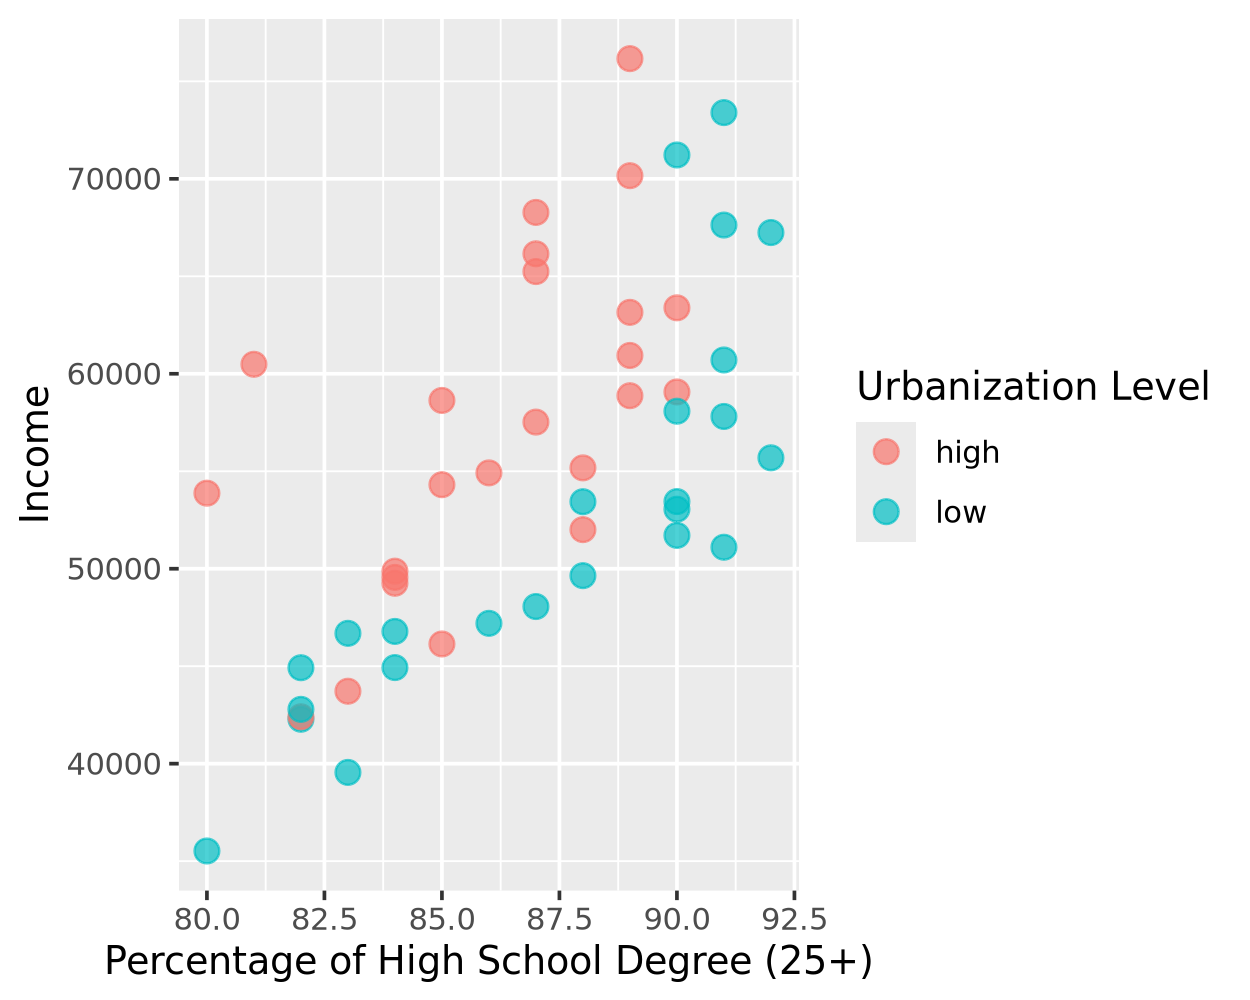

In [16]:
ggplot(hate_crimes, aes(x = hs, y = income, color = urbanization)) +
       geom_point(size = 3, alpha = 0.7) +
       labs(
           x = "Percentage of High School Degree (25+)",
           y = "Income",
           color = "Urbanization Level"
           )

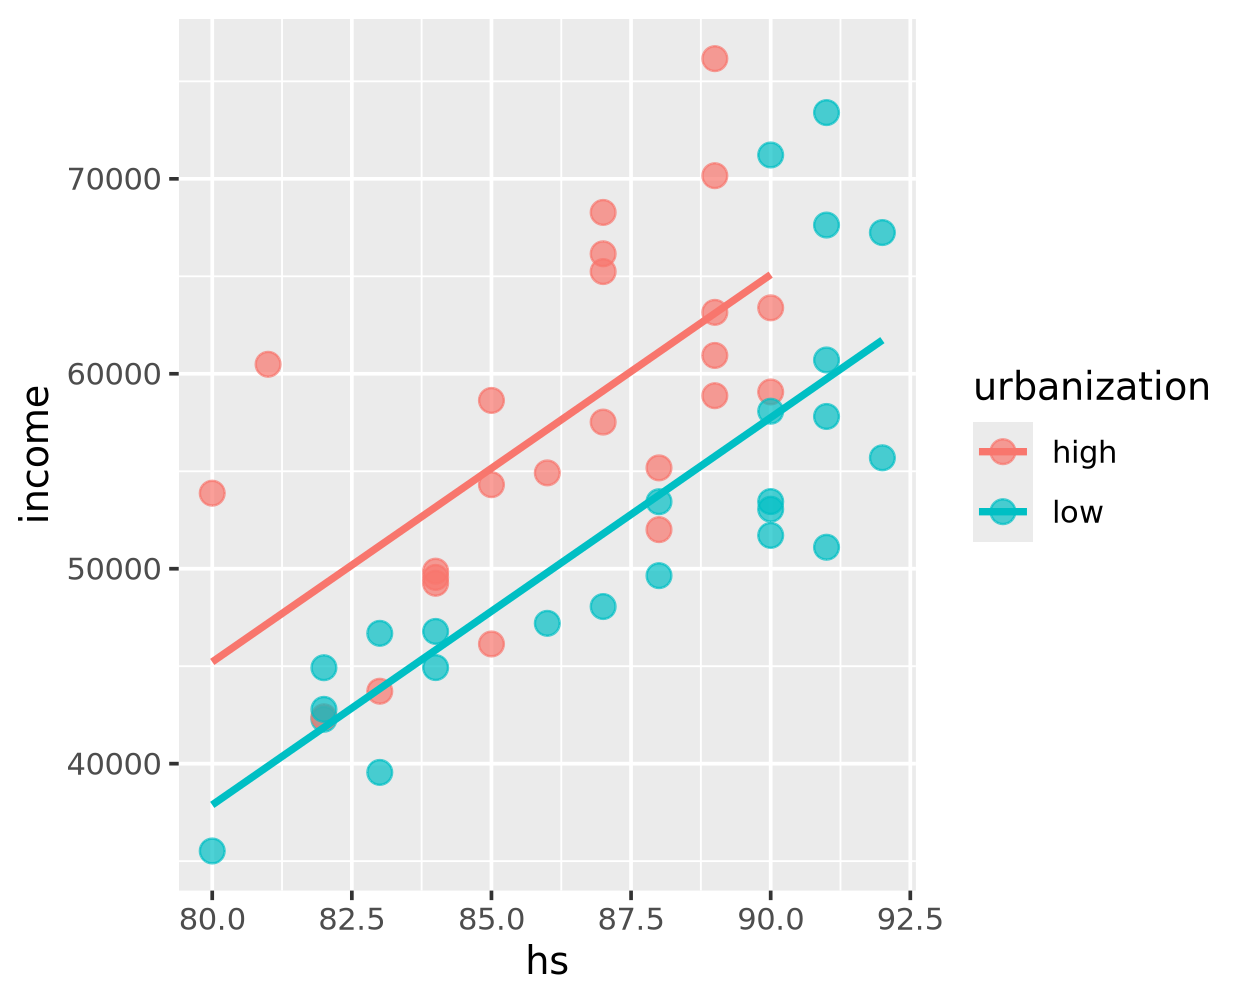

In [53]:
model <- lm(income ~ hs + urbanization, data = hate_crimes)
model_interact <- lm(income ~hs * urbanization, data = hate_crimes)
ggplot(model, aes(x = hs, y = income, color = urbanization)) +
       geom_point(size = 3, alpha = 0.7) +
       geom_parallel_slopes(se = FALSE, formula = y ~ x) #+
       # labs(
       #     x = "Percentage of High School Degree (25+)",
       #     y = "Income",
       #     color = "Urbanization Level"
       #     )

❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

High urbanization appears to have the larger intercept. Running tidy(model) indicates the low urbanization slope is -7469 lower than high urbanization.

In [54]:
tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanizationlow,-7333.326,1857.6592,-3.947616,2.744526e-04


In [55]:
tidy(model_interact)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-95647.4274,39937.8800,-2.3949050,0.0209485906
hs,1776.9938,463.2497,3.8359312,0.0003953977
urbanizationlow,-35393.9651,49893.5228,-0.7093900,0.4818248864
hs:urbanizationlow,323.9987,575.6838,0.5628067,0.5764231616


Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code your scatter plot in the cell below.**

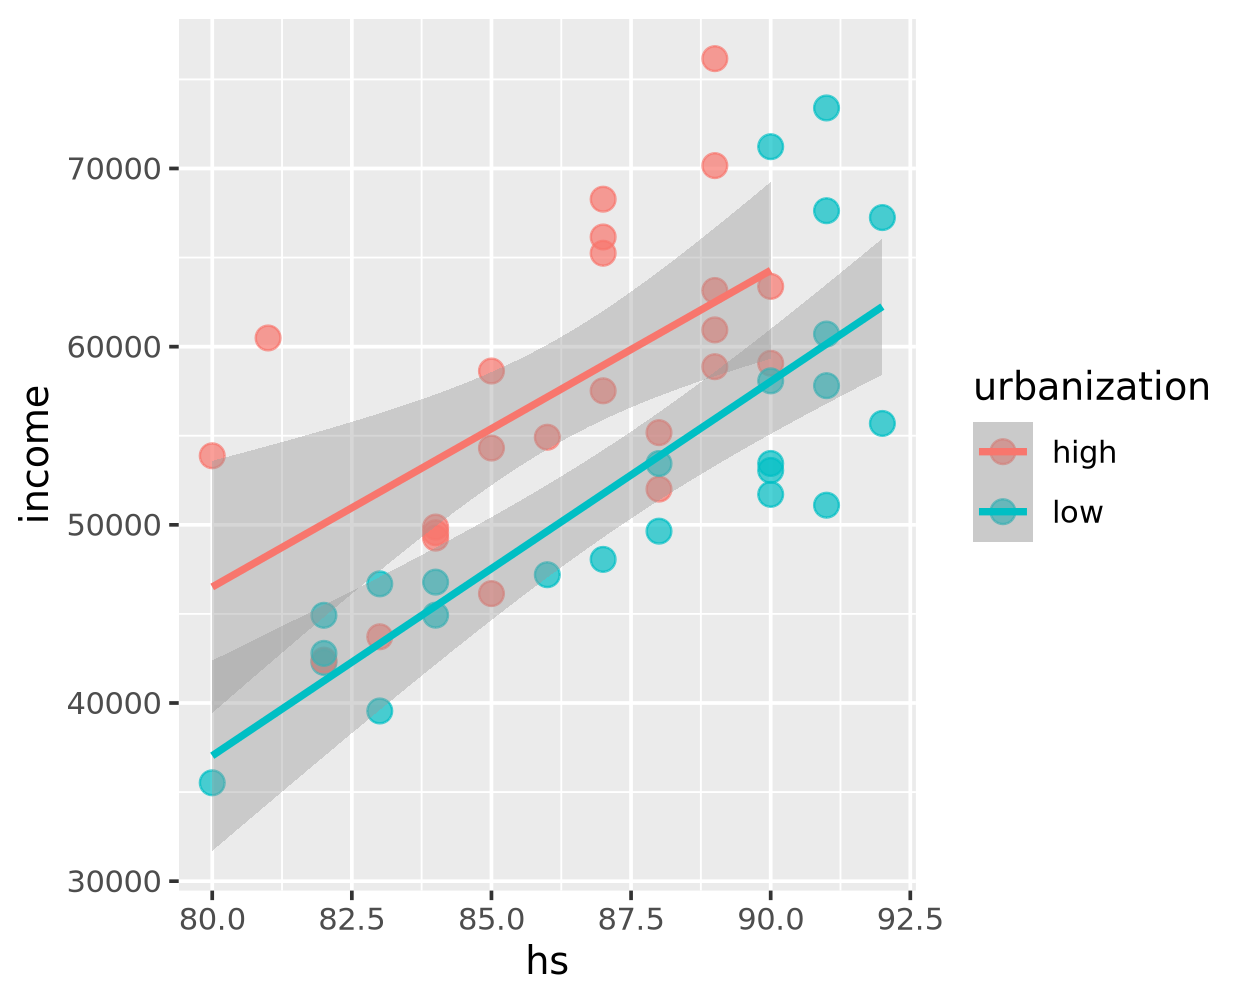

In [56]:
ggplot(model_interact, aes(x = hs, y = income, color = urbanization)) +
       geom_point(size = 3, alpha = 0.7) +
       geom_smooth(method = "lm", formula = y ~ x, se= TRUE) #+



In [57]:
summary(model)


Call:
lm(formula = income ~ hs + urbanization, data = hate_crimes)

Residuals:
   Min     1Q Median     3Q    Max 
 -9108  -4242  -1654   3168  13657 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -113725.2    23552.9  -4.828 1.62e-05 ***
hs                 1986.8      272.9   7.279 3.93e-09 ***
urbanizationlow   -7333.3     1857.7  -3.948 0.000274 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6326 on 45 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.5716,	Adjusted R-squared:  0.5526 
F-statistic: 30.02 on 2 and 45 DF,  p-value: 5.204e-09


In [58]:
summary(model_interact)


Call:
lm(formula = income ~ hs * urbanization, data = hate_crimes)

Residuals:
   Min     1Q Median     3Q    Max 
 -9257  -4243  -1258   3429  13660 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -95647.4    39937.9  -2.395 0.020949 *  
hs                   1777.0      463.2   3.836 0.000395 ***
urbanizationlow    -35394.0    49893.5  -0.709 0.481825    
hs:urbanizationlow    324.0      575.7   0.563 0.576423    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6374 on 44 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.5747,	Adjusted R-squared:  0.5457 
F-statistic: 19.82 on 3 and 44 DF,  p-value: 2.815e-08


❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Based on a review of the (2) plots, it appears that the (2) slopes are similar. The interaction term (hs:urbanizationlow) has a p-value of 0.576 which indicates it is not statistically significant. I would recommend the simple parallel slopes model for this example since the slopes appear similar and there is no statistically difference measured.



Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [28]:
# parallel slopes model

ps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

ps_mod = linear_reg() |> 
    set_engine('lm') |>
    set_mode("regression")

ps_mod_fit <- ps_mod |> 
    fit(income ~ ., data = juice(ps_rec))

ps_mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


In [44]:
head(hate_crimes)

,state,median_house_inc,share_pop_metro,hs,hate_crimes,trump_support,unemployment,urbanization,income
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,New Mexico,low,0.69,83,0.295,low,high,low,46686
2,Maine,low,0.54,90,0.616,low,low,low,51710
3,New York,low,0.94,85,0.351,low,low,high,54310
4,Illinois,low,0.90,86,0.195,low,high,high,54916
5,Delaware,high,0.90,87,0.323,low,low,high,57522
6,Rhode Island,high,1.00,85,0.095,low,high,high,58633


In [59]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...

nps_rec <- recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_dummy(urbanization) |>                       # dummy encode the urbanization variable
    step_interact(terms = ~ urbanization_low:hs) |> #interaction step for the non-parallell slopes model
    step_naomit(everything()) |>                      # remove missing values
    prep()                                            # run the recipe on the training data provided

nps_rec |> juice() |> head()

hs,income,urbanization_low,urbanization_low_x_hs
<int>,<int>,<dbl>,<dbl>
83,46686,1,83
90,51710,1,90
85,54310,0,0
86,54916,0,0
87,57522,0,0
85,58633,0,0


In [60]:

nps_mod = linear_reg() |> 
    set_engine('lm') |>
    fit(income ~ ., data = juice(nps_rec))

nps_mod |> tidy()


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-95647.4274,39937.8800,-2.3949050,0.0209485906
hs,1776.9938,463.2497,3.8359312,0.0003953977
urbanization_low,-35393.9651,49893.5228,-0.7093900,0.4818248864
urbanization_low_x_hs,323.9987,575.6838,0.5628067,0.5764231616


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [61]:
rbind(
    augment(ps_mod_fit, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
) |>
    group_by(model) |>
    summarize(r_squared = var(.pred) / var(income))



model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [40]:
glance(ps_mod_fit)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


In [42]:
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

The adjusted r_squared values for the parallel and non-parallel fitted models were 0.553 and 0.546, respectively. My preference in models is based on the fact that the parallel model has a slightly better r_squared value than the non-parallel. 



❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

In [70]:
ps_rec1 = recipe(income ~ urbanization, data = hate_crimes) |>
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

ps_mod1 = linear_reg() |> 
    set_engine('lm') |>
    set_mode("regression")

ps_mod_fit1 <- ps_mod1 |> 
    fit(income ~ ., data = juice(ps_rec1))

ps_mod_fit1 |> tidy()



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),57470.208,1846.811,31.118617,6.187325e-34
urbanization_low,-4243.579,2538.199,-1.671886,1.009218e-01


In [79]:
urbanization_effect <- ps_mod_fit |>
  tidy() |>
  filter(term == "urbanization_low") |>
  pull(estimate)

urbanization_effect

[1] -7333.326

In [82]:
urbanization_effect <- ps_mod_fit |>
  tidy()

urbanization_effect

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


ANSWER: Income is greater in States with higher urbanization by ~$7333. 

❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

In [75]:
hs_effect <- ps_mod_fit |>
  tidy() |>
  filter(term == "hs") |>
  pull(estimate)

hs_effect

[1] 1986.794

ANSWER: For every 1 percentage point increase of high-school educated adults in a state, the income increases by ~$1987.